In [2]:
# coding: utf-8

import requests
from bs4 import BeautifulSoup
import csv
r=requests.get('https://movie.douban.com/top250')
mypage= r.text

page_next=[]
url = 'https://movie.douban.com/top250'
for q in [-25,0,25,50,75,100,125,150,175,200,225]:
    page_number=str(q + 25)
    url_next=url+ "?start=" + page_number + '&filter='
    page_next.append(url_next)

cn_name = []
en_name = []
comment_number = []
rating = []

data = []

actors = []
year = []
area= []
types = []
genre = []
location = []
director  = []

for page in page_next:
    l1 = requests.get(page).text
    mypage = BeautifulSoup(l1,'html.parser')
    mylis = mypage.find('ol', attrs={'class': 'grid_view'}).find_all('li')

    for li in mylis:
        myspans = li.find('div', attrs={'class': 'hd'}).find_all('span')
        cn_name.append(myspans[0].text)
        en_name.append(myspans[1].text[3:])
        comment_number.append(li.find('div', attrs={'class': 'star'}).find_all('span')[3].text[:-3])
        rating.append(li.find('span', attrs={'class': 'rating_num'}).text)
        directors = li.find('p').text.strip()
        
        staff = directors.replace(u'\xa0', u' ')
        idx_director = staff.find('导演:')
        idx_actors = staff.find('主')
        if len(staff[idx_director:idx_actors]) < 61:
            director.append(staff[idx_director:idx_actors])
        else:
            director.append(staff[idx_director:62])
        parts = staff.split('/')
        year.append(parts[-3].split()[-1])
        area.append(parts[-2])
        types.append(parts[-1])


        # idx = director.find('主演')
        # directors.append(director[:idx])
        # actors.append(director[idx:])

        # d = [i.strip() for i in director[idx:].split('/')]
    # print(staff)
        # genre.append(d[-1])
        # location.append(d[-2]) 

# print (directors#data.append([cn_name, en_name,  rating, comment_number , director])





with open('data_new.csv','w') as f:
     writers = csv.writer(f)
     header = ['cn_name','alias','rating' , 'comment_number' , 'director','year','area','types']
     writers.writerow(header)
     writers.writerows(zip(cn_name,en_name,rating,comment_number,director,year,area,types))
#      writers.writerow(year)
#      writers.writerow(rating)
#      writers.writerow(types)

ModuleNotFoundError: No module named 'requests'

In [4]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [5]:
!pip3 install jieba

In [6]:
import jieba

In [7]:
df = pd.read_csv('Douban TOP 250.csv')
df

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,988856,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,718351,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
2,这个杀手不太冷,Léon,9.4,932418,导演: 吕克·贝松 Luc Besson,1994,法国,剧情 动作 犯罪
3,阿甘正传,Forrest Gump,9.4,792958,导演: Robert Zemeckis,1994,美国,剧情 爱情
4,美丽人生,La vita è bella,9.5,463283,导演: 罗伯托·贝尼尼 Roberto Benigni,1997,意大利,剧情 喜剧 爱情 战争
5,千与千寻,千と千尋の神隠し,9.2,741794,导演: 宫崎骏 Hayao Miyazaki,2001,日本,剧情 动画 奇幻
6,泰坦尼克号,Titanic,9.2,732447,导演: 詹姆斯·卡梅隆 James Cameron,1997,美国,剧情 爱情 灾难
7,辛德勒的名单,Schindler's List,9.4,422300,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
8,盗梦空间,Inception,9.3,834715,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险
9,机器人总动员,WALL·E,9.3,547345,导演: 安德鲁·斯坦顿 Andrew Stanton,2008,美国,爱情 科幻 动画 冒险


In [77]:
df['rating'].mean()

8.782399999999999

In [78]:
df['rating'].min()

8.3

In [79]:
df['rating'].max()

9.6

In [80]:
df['director'].value_counts()

导演: 宫崎骏 Hayao Miyazaki                                             7
导演: 克里斯托弗·诺兰 Christopher Nolan                                     7
导演: 王家卫 Kar Wai Wong                                               5
导演: 史蒂文·斯皮尔伯格 Steven Spielberg                                     5
导演: 大卫·芬奇 David Fincher                                            4
导演: 李安 Ang Lee                                                     4
导演: 彼得·杰克逊 Peter Jackson                                           3
导演: 詹姆斯·卡梅隆 James Cameron                                          3
导演: 吴宇森 John Woo                                                   3
导演: 刘镇伟 Jeffrey Lau                                                3
导演: 姜文 Wen Jiang                                                   3
导演: 朱塞佩·托纳多雷 Giuseppe Tornatore                                    3
导演: 弗朗西斯·福特·科波拉 Francis Ford Coppola                               3
导演: 理查德·林克莱特 Richard Linklater                                     3
导演: 理查德·柯蒂斯 Richard Curtis        

In [8]:
for types in df['types']:
    print(types)

 犯罪 剧情
 剧情 爱情 同性
 剧情 动作 犯罪
 剧情 爱情
 剧情 喜剧 爱情 战争
 剧情 动画 奇幻
 剧情 爱情 灾难
 剧情 历史 战争
 剧情 科幻 悬疑 冒险
 爱情 科幻 动画 冒险
 剧情 音乐
 剧情 喜剧 爱情 歌舞
 剧情
 剧情 音乐
 喜剧 爱情 奇幻 冒险
 剧情 犯罪
 儿童 动画 奇幻 家庭
 剧情 科幻
 剧情
 剧情 历史 爱情 战争
 剧情 科幻 冒险
 剧情 喜剧
 剧情 犯罪 悬疑
 剧情 传记 家庭
 剧情 爱情
 剧情 喜剧 爱情
 剧情
 剧情 动作 悬疑 惊悚
 剧情 奇幻 冒险
 剧情 动作 奇幻 冒险
 剧情 战争
 剧情 动作 科幻 犯罪 惊悚
 剧情 历史 家庭
 动画 奇幻 冒险
 喜剧 剧情 爱情
 喜剧 爱情 奇幻 冒险
 剧情 喜剧 动画 冒险
 喜剧 动画 冒险
 剧情 悬疑
 剧情 喜剧 犯罪
 剧情
 剧情 犯罪 悬疑
 剧情
 纪录片
 爱情 动画 奇幻 冒险
 剧情 动作 科幻 惊悚
 剧情
 剧情
 剧情 犯罪
 传记 剧情
 剧情 动作 奇幻 冒险
 剧情 动作 奇幻 冒险
 剧情 爱情
 剧情 家庭
 犯罪 剧情
 剧情 动画 冒险 歌舞 家庭
 喜剧 爱情
 剧情 传记 历史 战争
 剧情 犯罪 悬疑 惊悚
 剧情 歌舞
 剧情 家庭 儿童
 剧情
 剧情 悬疑 惊悚
 剧情 传记 运动 家庭
 动作 传记 剧情 历史 战争
 剧情 传记 爱情 歌舞
 剧情 奇幻 爱情
 剧情 爱情 奇幻
 剧情 喜剧 犯罪
 剧情 犯罪 悬疑 惊悚
 剧情 战争 情色
 动作 科幻
 剧情 历史 战争
 剧情 犯罪 惊悚
 剧情
 剧情 悬疑 科幻 惊悚
 剧情 动画
 剧情 喜剧 动作 西部
 剧情 爱情 同性
 动画 奇幻
 剧情
 动作 爱情 战争 动画 奇幻 冒险
 剧情
 剧情 悬疑 惊悚
 剧情 传记 历史
 剧情 爱情
 剧情 悬疑 惊悚
 剧情 家庭 奇幻 冒险
 剧情
 剧情 喜剧
 喜剧 古装
 剧情 爱情
 剧情 悬疑 惊悚
 奇幻 冒险
 剧情 爱情 家庭
 剧情 喜剧
 剧情 爱情 同性 家庭
 剧情 惊悚
 犯罪 剧情
 传记 犯罪 剧情
 动作 冒险 奇幻
 喜剧 剧情 爱情
 动作 科幻 冒险
 剧情 战争
 剧情 爱情
 科幻 动画 奇幻 冒险
 剧情 犯

In [9]:
all_types=[]
for types in df['types']:
    print(types)

 犯罪 剧情
 剧情 爱情 同性
 剧情 动作 犯罪
 剧情 爱情
 剧情 喜剧 爱情 战争
 剧情 动画 奇幻
 剧情 爱情 灾难
 剧情 历史 战争
 剧情 科幻 悬疑 冒险
 爱情 科幻 动画 冒险
 剧情 音乐
 剧情 喜剧 爱情 歌舞
 剧情
 剧情 音乐
 喜剧 爱情 奇幻 冒险
 剧情 犯罪
 儿童 动画 奇幻 家庭
 剧情 科幻
 剧情
 剧情 历史 爱情 战争
 剧情 科幻 冒险
 剧情 喜剧
 剧情 犯罪 悬疑
 剧情 传记 家庭
 剧情 爱情
 剧情 喜剧 爱情
 剧情
 剧情 动作 悬疑 惊悚
 剧情 奇幻 冒险
 剧情 动作 奇幻 冒险
 剧情 战争
 剧情 动作 科幻 犯罪 惊悚
 剧情 历史 家庭
 动画 奇幻 冒险
 喜剧 剧情 爱情
 喜剧 爱情 奇幻 冒险
 剧情 喜剧 动画 冒险
 喜剧 动画 冒险
 剧情 悬疑
 剧情 喜剧 犯罪
 剧情
 剧情 犯罪 悬疑
 剧情
 纪录片
 爱情 动画 奇幻 冒险
 剧情 动作 科幻 惊悚
 剧情
 剧情
 剧情 犯罪
 传记 剧情
 剧情 动作 奇幻 冒险
 剧情 动作 奇幻 冒险
 剧情 爱情
 剧情 家庭
 犯罪 剧情
 剧情 动画 冒险 歌舞 家庭
 喜剧 爱情
 剧情 传记 历史 战争
 剧情 犯罪 悬疑 惊悚
 剧情 歌舞
 剧情 家庭 儿童
 剧情
 剧情 悬疑 惊悚
 剧情 传记 运动 家庭
 动作 传记 剧情 历史 战争
 剧情 传记 爱情 歌舞
 剧情 奇幻 爱情
 剧情 爱情 奇幻
 剧情 喜剧 犯罪
 剧情 犯罪 悬疑 惊悚
 剧情 战争 情色
 动作 科幻
 剧情 历史 战争
 剧情 犯罪 惊悚
 剧情
 剧情 悬疑 科幻 惊悚
 剧情 动画
 剧情 喜剧 动作 西部
 剧情 爱情 同性
 动画 奇幻
 剧情
 动作 爱情 战争 动画 奇幻 冒险
 剧情
 剧情 悬疑 惊悚
 剧情 传记 历史
 剧情 爱情
 剧情 悬疑 惊悚
 剧情 家庭 奇幻 冒险
 剧情
 剧情 喜剧
 喜剧 古装
 剧情 爱情
 剧情 悬疑 惊悚
 奇幻 冒险
 剧情 爱情 家庭
 剧情 喜剧
 剧情 爱情 同性 家庭
 剧情 惊悚
 犯罪 剧情
 传记 犯罪 剧情
 动作 冒险 奇幻
 喜剧 剧情 爱情
 动作 科幻 冒险
 剧情 战争
 剧情 爱情
 科幻 动画 奇幻 冒险
 剧情 犯

In [10]:
# list(jieba.cut( df['types'][1]))

In [11]:
df['types']

0             犯罪 剧情
1          剧情 爱情 同性
2          剧情 动作 犯罪
3             剧情 爱情
4       剧情 喜剧 爱情 战争
5          剧情 动画 奇幻
6          剧情 爱情 灾难
7          剧情 历史 战争
8       剧情 科幻 悬疑 冒险
9       爱情 科幻 动画 冒险
10            剧情 音乐
11      剧情 喜剧 爱情 歌舞
12               剧情
13            剧情 音乐
14      喜剧 爱情 奇幻 冒险
15            剧情 犯罪
16      儿童 动画 奇幻 家庭
17            剧情 科幻
18               剧情
19      剧情 历史 爱情 战争
20         剧情 科幻 冒险
21            剧情 喜剧
22         剧情 犯罪 悬疑
23         剧情 传记 家庭
24            剧情 爱情
25         剧情 喜剧 爱情
26               剧情
27      剧情 动作 悬疑 惊悚
28         剧情 奇幻 冒险
29      剧情 动作 奇幻 冒险
           ...     
220           犯罪 剧情
221              剧情
222           剧情 爱情
223        剧情 爱情 动画
224     剧情 犯罪 悬疑 惊悚
225           剧情 传记
226        剧情 悬疑 惊悚
227        剧情 爱情 同性
228        剧情 运动 家庭
229     喜剧 动画 奇幻 冒险
230           喜剧 犯罪
231              剧情
232              喜剧
233        剧情 传记 历史
234        剧情 惊悚 冒险
235           剧情 家庭
236        剧情 爱情 同性
237        剧情 动作 犯罪
238        剧情 犯罪 悬疑


In [12]:
all_types=df['types'].value_counts().index

In [13]:
all_types

Index([' 剧情', ' 剧情 爱情', ' 剧情 家庭', ' 剧情 犯罪', ' 剧情 悬疑 惊悚', ' 犯罪 剧情', ' 喜剧 剧情 爱情',
       ' 剧情 犯罪 悬疑', ' 喜剧 动画 冒险', ' 剧情 喜剧',
       ...
       ' 剧情 犯罪 惊悚', ' 犯罪 剧情 奇幻 悬疑', ' 剧情 战争 情色', ' 传记 犯罪 剧情', ' 剧情 动作 西部 冒险',
       ' 剧情 家庭 儿童', ' 动画 奇幻', ' 剧情 运动 家庭', ' 剧情 爱情 武侠 古装', ' 剧情 悬疑 奇幻 冒险'],
      dtype='object', length=135)

In [14]:
all_types=[]
for types in df['types']:
    x=list(jieba.cut(types))
    all_types.extend(x)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/sk/fp6ry8ss3md7gdyr3b1qcnb80000gn/T/jieba.cache
Loading model cost 1.003 seconds.
Prefix dict has been built succesfully.


In [15]:
all_types

[' ',
 '犯罪',
 ' ',
 '剧情',
 ' ',
 '剧情',
 ' ',
 '爱情',
 ' ',
 '同性',
 ' ',
 '剧情',
 ' ',
 '动作',
 ' ',
 '犯罪',
 ' ',
 '剧情',
 ' ',
 '爱情',
 ' ',
 '剧情',
 ' ',
 '喜剧',
 ' ',
 '爱情',
 ' ',
 '战争',
 ' ',
 '剧情',
 ' ',
 '动画',
 ' ',
 '奇幻',
 ' ',
 '剧情',
 ' ',
 '爱情',
 ' ',
 '灾难',
 ' ',
 '剧情',
 ' ',
 '历史',
 ' ',
 '战争',
 ' ',
 '剧情',
 ' ',
 '科幻',
 ' ',
 '悬疑',
 ' ',
 '冒险',
 ' ',
 '爱情',
 ' ',
 '科幻',
 ' ',
 '动画',
 ' ',
 '冒险',
 ' ',
 '剧情',
 ' ',
 '音乐',
 ' ',
 '剧情',
 ' ',
 '喜剧',
 ' ',
 '爱情',
 ' ',
 '歌舞',
 ' ',
 '剧情',
 ' ',
 '剧情',
 ' ',
 '音乐',
 ' ',
 '喜剧',
 ' ',
 '爱情',
 ' ',
 '奇幻',
 ' ',
 '冒险',
 ' ',
 '剧情',
 ' ',
 '犯罪',
 ' ',
 '儿童',
 ' ',
 '动画',
 ' ',
 '奇幻',
 ' ',
 '家庭',
 ' ',
 '剧情',
 ' ',
 '科幻',
 ' ',
 '剧情',
 ' ',
 '剧情',
 ' ',
 '历史',
 ' ',
 '爱情',
 ' ',
 '战争',
 ' ',
 '剧情',
 ' ',
 '科幻',
 ' ',
 '冒险',
 ' ',
 '剧情',
 ' ',
 '喜剧',
 ' ',
 '剧情',
 ' ',
 '犯罪',
 ' ',
 '悬疑',
 ' ',
 '剧情',
 ' ',
 '传记',
 ' ',
 '家庭',
 ' ',
 '剧情',
 ' ',
 '爱情',
 ' ',
 '剧情',
 ' ',
 '喜剧',
 ' ',
 '爱情',
 ' ',
 '剧情',
 ' ',
 '剧情',
 ' ',
 '动作',
 ' ',
 '悬疑',

In [16]:
types_count={}

In [17]:
while ' ' in all_types:
    all_types.remove(' ')

In [18]:
all_types

['犯罪',
 '剧情',
 '剧情',
 '爱情',
 '同性',
 '剧情',
 '动作',
 '犯罪',
 '剧情',
 '爱情',
 '剧情',
 '喜剧',
 '爱情',
 '战争',
 '剧情',
 '动画',
 '奇幻',
 '剧情',
 '爱情',
 '灾难',
 '剧情',
 '历史',
 '战争',
 '剧情',
 '科幻',
 '悬疑',
 '冒险',
 '爱情',
 '科幻',
 '动画',
 '冒险',
 '剧情',
 '音乐',
 '剧情',
 '喜剧',
 '爱情',
 '歌舞',
 '剧情',
 '剧情',
 '音乐',
 '喜剧',
 '爱情',
 '奇幻',
 '冒险',
 '剧情',
 '犯罪',
 '儿童',
 '动画',
 '奇幻',
 '家庭',
 '剧情',
 '科幻',
 '剧情',
 '剧情',
 '历史',
 '爱情',
 '战争',
 '剧情',
 '科幻',
 '冒险',
 '剧情',
 '喜剧',
 '剧情',
 '犯罪',
 '悬疑',
 '剧情',
 '传记',
 '家庭',
 '剧情',
 '爱情',
 '剧情',
 '喜剧',
 '爱情',
 '剧情',
 '剧情',
 '动作',
 '悬疑',
 '惊悚',
 '剧情',
 '奇幻',
 '冒险',
 '剧情',
 '动作',
 '奇幻',
 '冒险',
 '剧情',
 '战争',
 '剧情',
 '动作',
 '科幻',
 '犯罪',
 '惊悚',
 '剧情',
 '历史',
 '家庭',
 '动画',
 '奇幻',
 '冒险',
 '喜剧',
 '剧情',
 '爱情',
 '喜剧',
 '爱情',
 '奇幻',
 '冒险',
 '剧情',
 '喜剧',
 '动画',
 '冒险',
 '喜剧',
 '动画',
 '冒险',
 '剧情',
 '悬疑',
 '剧情',
 '喜剧',
 '犯罪',
 '剧情',
 '剧情',
 '犯罪',
 '悬疑',
 '剧情',
 '纪录片',
 '爱情',
 '动画',
 '奇幻',
 '冒险',
 '剧情',
 '动作',
 '科幻',
 '惊悚',
 '剧情',
 '剧情',
 '剧情',
 '犯罪',
 '传记',
 '剧情',
 '剧情',
 '动作',
 '奇幻',
 '冒险',
 '剧情',
 '动作'

In [19]:
len(all_types)

694

In [20]:
45/648

0.06944444444444445

In [21]:
for types in all_types:
    if types not in types_count:
        types_count[types]=1
    else:
        types_count[types]=types_count[types]+1

In [22]:
types_count

{'传记': 14,
 '儿童': 4,
 '冒险': 41,
 '剧情': 195,
 '动作': 30,
 '动画': 33,
 '历史': 11,
 '古装': 6,
 '同性': 8,
 '喜剧': 45,
 '奇幻': 33,
 '家庭': 25,
 '恐怖': 2,
 '悬疑': 34,
 '情色': 1,
 '惊悚': 34,
 '战争': 19,
 '歌舞': 5,
 '武侠': 3,
 '灾难': 1,
 '爱情': 63,
 '犯罪': 45,
 '科幻': 25,
 '纪录片': 4,
 '西部': 4,
 '运动': 2,
 '音乐': 7}

In [23]:
len(types_count)

27

In [24]:
pd.Series(types_count).sort_values(ascending=False)

剧情     195
爱情      63
犯罪      45
喜剧      45
冒险      41
悬疑      34
惊悚      34
动画      33
奇幻      33
动作      30
家庭      25
科幻      25
战争      19
传记      14
历史      11
同性       8
音乐       7
古装       6
歌舞       5
纪录片      4
西部       4
儿童       4
武侠       3
恐怖       2
运动       2
情色       1
灾难       1
dtype: int64

In [25]:
df_types_count=pd.Series(types_count).to_frame().reset_index()

In [26]:
df_types_count

,index,0
0,传记,14
1,儿童,4
2,冒险,41
3,剧情,195
4,动作,30
5,动画,33
6,历史,11
7,古装,6
8,同性,8
9,喜剧,45


In [27]:
df_types_count.to_csv('types_csv')

In [28]:
# for area in df['area']:
    print(area)

IndentationError: unexpected indent (<ipython-input-28-b80b856e398a>, line 2)

In [29]:
all_area=df['area'].value_counts().index

In [30]:
all_area

Index([' 美国 ', ' 日本 ', ' 香港 ', ' 美国 英国 ', ' 韩国 ', ' 美国 德国 ', ' 中国大陆 香港 ',
       ' 英国 ', ' 中国大陆 ', ' 美国 加拿大 ', ' 英国 美国 ', ' 香港 中国大陆 ', ' 美国 法国 ', ' 印度 ',
       ' 美国 澳大利亚 ', ' 法国 ', ' 德国 ', ' 美国 德国 英国 ', ' 意大利 ', ' 台湾 美国 ',
       ' 美国 新西兰 ', ' 意大利 美国 ', ' 美国 奥地利 瑞士 ', ' 英国 德国 法国 ', ' 巴西 法国 ',
       ' 意大利 中国大陆 英国 法国 ', ' 意大利 法国 巴西 美国 ', ' 香港 台湾 ', ' 香港 法国 ',
       ' 美国 德国 捷克 ', ' 瑞典 ', ' 法国 美国 意大利 ', ' 法国 英国 ', ' 法国 美国 ', ' 阿根廷 西班牙 ',
       ' 澳大利亚 ', ' 爱尔兰 加拿大 英国 美国 ', ' 香港 日本 韩国 ', ' 美国 英国 德国 ', ' 新西兰 美国 ',
       ' 英国 美国 法国 ', ' 法国 德国 英国 波兰 ', ' 爱尔兰 ', ' 意大利 法国 ', ' 伊朗 法国 ', ' 台湾 ',
       ' 博茨瓦纳 南非 ', ' 法国 德国 意大利 西班牙 瑞士 ', ' 泰国 ', ' 台湾 日本 ', ' 意大利 西班牙 西德 ',
       ' 德国 法国 西班牙 美国 ', ' 法国 瑞士 德国 ', ' 台湾 法国 ', ' 英国 澳大利亚 ',
       ' 英国 南非 意大利 美国 ', ' 法国 英国 美国 ', ' 伊朗 ', ' 美国 英国 加拿大 冰岛 ',
       ' 美国 台湾 英国 加拿大 ', ' 丹麦 瑞典 ', ' 法国 德国 ', ' 西班牙 ', ' 德国 美国 ',
       ' 法国 瑞士 西班牙 美国 阿联酋 ', ' 英国 澳大利亚 美国 '],
      dtype='object')

In [31]:
all_area=[]
for area in df['area']:
    x=list(jieba.cut(area))
    all_area.extend(x)

In [32]:
all_area

[' ',
 '美国',
 ' ',
 ' ',
 '中国',
 '大陆',
 ' ',
 '香港',
 ' ',
 ' ',
 '法国',
 ' ',
 ' ',
 '美国',
 ' ',
 ' ',
 '意大利',
 ' ',
 ' ',
 '日本',
 ' ',
 ' ',
 '美国',
 ' ',
 ' ',
 '美国',
 ' ',
 ' ',
 '美国',
 ' ',
 '英国',
 ' ',
 ' ',
 '美国',
 ' ',
 ' ',
 '意大利',
 ' ',
 ' ',
 '印度',
 ' ',
 ' ',
 '美国',
 ' ',
 '英国',
 ' ',
 ' ',
 '法国',
 ' ',
 '瑞士',
 ' ',
 '德国',
 ' ',
 ' ',
 '香港',
 ' ',
 '中国',
 '大陆',
 ' ',
 ' ',
 '美国',
 ' ',
 ' ',
 '日本',
 ' ',
 ' ',
 '美国',
 ' ',
 ' ',
 '韩国',
 ' ',
 ' ',
 '美国',
 ' ',
 ' ',
 '美国',
 ' ',
 '英国',
 ' ',
 '加拿大',
 ' ',
 '冰岛',
 ' ',
 ' ',
 '法国',
 ' ',
 ' ',
 '香港',
 ' ',
 ' ',
 '美国',
 ' ',
 ' ',
 '意大利',
 ' ',
 '法国',
 ' ',
 ' ',
 '美国',
 ' ',
 ' ',
 '美国',
 ' ',
 ' ',
 '美国',
 ' ',
 '德国',
 ' ',
 ' ',
 '美国',
 ' ',
 '台湾',
 ' ',
 '英国',
 ' ',
 '加拿大',
 ' ',
 ' ',
 '美国',
 ' ',
 '新西兰',
 ' ',
 ' ',
 '中国',
 '大陆',
 ' ',
 ' ',
 '美国',
 ' ',
 '英国',
 ' ',
 ' ',
 '中国',
 '大陆',
 ' ',
 '香港',
 ' ',
 ' ',
 '日本',
 ' ',
 ' ',
 '美国',
 ' ',
 ' ',
 '香港',
 ' ',
 '中国',
 '大陆',
 ' ',
 ' ',
 '美国',
 ' ',
 ' ',
 '美国',
 ' ',
 ' 

In [33]:
area_count={}

In [34]:
while ' ' in all_area:
    all_area.remove(' ')

In [35]:
all_area

['美国',
 '中国',
 '大陆',
 '香港',
 '法国',
 '美国',
 '意大利',
 '日本',
 '美国',
 '美国',
 '美国',
 '英国',
 '美国',
 '意大利',
 '印度',
 '美国',
 '英国',
 '法国',
 '瑞士',
 '德国',
 '香港',
 '中国',
 '大陆',
 '美国',
 '日本',
 '美国',
 '韩国',
 '美国',
 '美国',
 '英国',
 '加拿大',
 '冰岛',
 '法国',
 '香港',
 '美国',
 '意大利',
 '法国',
 '美国',
 '美国',
 '美国',
 '德国',
 '美国',
 '台湾',
 '英国',
 '加拿大',
 '美国',
 '新西兰',
 '中国',
 '大陆',
 '美国',
 '英国',
 '中国',
 '大陆',
 '香港',
 '日本',
 '美国',
 '香港',
 '中国',
 '大陆',
 '美国',
 '美国',
 '德国',
 '英国',
 '美国',
 '美国',
 '美国',
 '美国',
 '日本',
 '美国',
 '英国',
 '德国',
 '韩国',
 '美国',
 '美国',
 '美国',
 '美国',
 '新西兰',
 '新西兰',
 '美国',
 '日本',
 '台湾',
 '美国',
 '意大利',
 '美国',
 '美国',
 '法国',
 '德国',
 '法国',
 '德国',
 '英国',
 '波兰',
 '美国',
 '日本',
 '伊朗',
 '韩国',
 '美国',
 '英国',
 '印度',
 '美国',
 '美国',
 '美国',
 '美国',
 '美国',
 '西班牙',
 '意大利',
 '美国',
 '美国',
 '澳大利亚',
 '美国',
 '美国',
 '日本',
 '美国',
 '加拿大',
 '澳大利亚',
 '中国',
 '大陆',
 '香港',
 '香港',
 '日本',
 '韩国',
 '中国',
 '大陆',
 '美国',
 '日本',
 '中国',
 '大陆',
 '香港',
 '美国',
 '意大利',
 '中国',
 '大陆',
 '英国',
 '法国',
 '香港',
 '美国',
 '美国',
 '丹麦',
 '瑞典',
 '美国',
 '德国',
 '英

In [36]:
for area in all_area:
    if area not in area_count:
        area_count[area]=1
    else:
        area_count[area]=area_count[area]+1

In [37]:
dfArea=pd.Series(area_count).to_frame().reset_index()
dfArea

,index,0
0,中国,16
1,丹麦,1
2,伊朗,2
3,冰岛,1
4,加拿大,7
5,南非,2
6,博茨瓦纳,1
7,印度,3
8,台湾,7
9,大陆,16


In [38]:
dfArea.sort_values(by=0,ascending=False).to_csv('area.csv')

In [39]:
dfArea.to_csv('area.csv')

In [40]:
def is_select(x):
    return x.find('印度') != -1 
df_in = df[df['area'].apply(is_select)]
df_in

,cn_name,alias,rating,comment_number,director,year,area,types
11,三傻大闹宝莱坞,3 Idiots,9.2,748206,导演: 拉库马·希拉尼 Rajkumar Hirani,2009,印度,剧情 喜剧 爱情 歌舞
63,摔跤吧！爸爸,Dangal,9.1,495927,导演: 涅提·蒂瓦里 Nitesh Tiwari,2016,印度,剧情 传记 运动 家庭
177,地球上的星星,Taare Zameen Par,8.8,87784,导演: 阿米尔·汗 Aamir Khan,2007,印度,剧情 儿童 家庭


In [41]:
def is_select(x):
    return x.find('韩国') != -1 
df_K = df[df['area'].apply(is_select)]
df_K

,cn_name,alias,rating,comment_number,director,year,area,types
18,熔炉,도가니,9.2,299136,导演: 黄东赫 Dong-hyuk Hwang,2011,韩国,剧情
46,辩护人,변호인,9.1,229708,导演: 杨宇硕 Woo-seok Yang,2013,韩国,剧情
61,素媛,소원,9.1,199184,导演: 李濬益 Jun-ik Lee,2013,韩国,剧情
78,春光乍泄,春光乍洩,8.8,263608,导演: 王家卫 Kar Wai Wong,1997,香港 日本 韩国,剧情 爱情 同性
95,阳光姐妹淘,써니,8.8,284029,导演: 姜炯哲 Hyeong-Cheol Kang,2011,韩国,剧情 喜剧
113,恐怖直播,더 테러 라이브,8.7,234645,导演: 金秉祐 Byeong-woo Kim,2013,韩国,剧情 犯罪 悬疑
125,杀人回忆,살인의 추억,8.6,218332,导演: 奉俊昊 Joon-ho Bong,2003,韩国,犯罪 剧情 悬疑 惊悚
142,7号房的礼物,7번방의 선물,8.7,183997,导演: 李焕庆 Hwan-kyeong Lee,2013,韩国,剧情 喜剧 家庭
240,爱·回家,집으로...,9.0,47990,导演: 李廷香 Jeong-hyang Lee,2002,韩国,剧情 家庭
242,我爱你,그대를 사랑합니다,9.0,58319,导演: 秋昌民 Chang-min Choo,2011,韩国,剧情 爱情


In [42]:
def is_select(x):
    return x.find('巴西') != -1 
df_b = df[df['area'].apply(is_select)]
df_b

,cn_name,alias,rating,comment_number,director,year,area,types
98,上帝之城,Cidade de Deus,8.9,164465,导演: Kátia Lund / Fernando Meirelles,2002,巴西 法国,犯罪 剧情
227,请以你的名字呼唤我,Call Me by Your Name,8.8,143622,导演: 卢卡·圭达尼诺 Luca Guadagnino,2017,意大利 法国 巴西 美国,剧情 爱情 同性


In [43]:
def cleaning(x):
    if x in ['2004(中国大陆)']:
        return False
    else:
        return True
df_year=df[df['year'].apply(cleaning)]['year'].value_counts()

In [48]:
df_year

2004    13
2010    13
2001    12
2009    11
1994    11
2013    10
2011    10
2008    10
2002     9
2006     9
2014     9
1997     9
1999     8
2003     8
1995     8
2007     7
1993     7
2000     7
2016     6
2015     5
1991     5
1998     5
1988     5
1996     5
2012     5
2005     4
1990     3
1987     3
1984     2
1957     2
1989     2
1986     2
1992     2
1953     2
1966     2
1940     1
1979     1
1950     1
1936     1
1960     1
1965     1
1942     1
1974     1
1980     1
2017     1
1954     1
1971     1
1931     1
1975     1
1939     1
1952     1
1972     1
1982     1
Name: year, dtype: int64

In [49]:
df_w=df_year.to_frame()
df_w

,year
2004,13
2010,13
2001,12
2009,11
1994,11
2013,10
2011,10
2008,10
2002,9
2006,9


In [50]:
df_w.to_csv('w_year.csv')

In [51]:
s_year=df_year.value_counts()

In [52]:
s_year=df_year.sort_index()

In [53]:
s_year.index.astype('int')

Int64Index([1931, 1936, 1939, 1940, 1942, 1950, 1952, 1953, 1954, 1957, 1960,
            1965, 1966, 1971, 1972, 1974, 1975, 1979, 1980, 1982, 1984, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64')

In [55]:
!pip3 install matplotlib

  Using cached matplotlib-2.2.0-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached cycler-0.10.0-py2.py3-none-any.whl
  Using cached pyparsing-2.2.0-py2.py3-none-any.whl
  Using cached kiwisolver-1.0.1-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl


In [56]:
from matplotlib import pyplot as plt

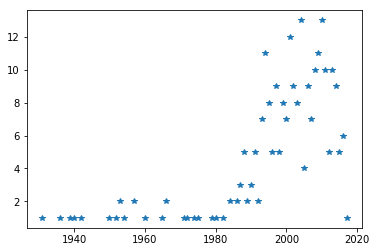

In [57]:
plt.plot(s_year.index.astype('int'), s_year.values, '*')

In [59]:
def is_select(x):
    return x.find('美国') != -1 
df_A = df[df['area'].apply(is_select)]

In [60]:
df_A

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,988856,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
3,阿甘正传,Forrest Gump,9.4,792958,导演: Robert Zemeckis,1994,美国,剧情 爱情
6,泰坦尼克号,Titanic,9.2,732447,导演: 詹姆斯·卡梅隆 James Cameron,1997,美国,剧情 爱情 灾难
7,辛德勒的名单,Schindler's List,9.4,422300,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
8,盗梦空间,Inception,9.3,834715,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险
9,机器人总动员,WALL·E,9.3,547345,导演: 安德鲁·斯坦顿 Andrew Stanton,2008,美国,爱情 科幻 动画 冒险
12,忠犬八公的故事,Hachi: A Dog's Tale,9.2,514134,导演: 莱塞·霍尔斯道姆 Lasse Hallström,2009,美国 英国,剧情
15,教父,The Godfather,9.2,376533,导演: 弗朗西斯·福特·科波拉 Francis Ford Coppola,1972,美国,剧情 犯罪
17,楚门的世界,The Truman Show,9.1,515863,导演: 彼得·威尔 Peter Weir,1998,美国,剧情 科幻
19,乱世佳人,Gone with the Wind,9.2,293599,导演: 维克多·弗莱明 Victor Fleming / 乔治·库克 George Cuko...,1939,美国,剧情 历史 爱情 战争


In [62]:
dfA=df_A['year'].value_counts()

In [63]:
dfA

2004    9
2001    8
2010    8
2008    7
2003    7
2014    6
2009    6
1994    6
1999    5
2013    5
2012    4
1995    4
2011    4
2002    4
2000    4
2006    4
1997    4
2007    4
2005    4
1991    3
1993    3
2016    3
1990    2
2015    2
1998    2
1996    2
1957    2
1988    2
1952    1
1960    1
1942    1
1971    1
2017    1
1931    1
1982    1
1984    1
1940    1
1975    1
1972    1
1992    1
1974    1
1965    1
1989    1
1936    1
1939    1
1953    1
Name: year, dtype: int64

In [ ]:
dfA.to_frame().to_csv('A_year.csv')

In [64]:
s_yearA=dfA.value_counts()

In [65]:
s_yearA=dfA.sort_index()

In [66]:
s_year.index.astype('int')

Int64Index([1931, 1936, 1939, 1940, 1942, 1950, 1952, 1953, 1954, 1957, 1960,
            1965, 1966, 1971, 1972, 1974, 1975, 1979, 1980, 1982, 1984, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64')

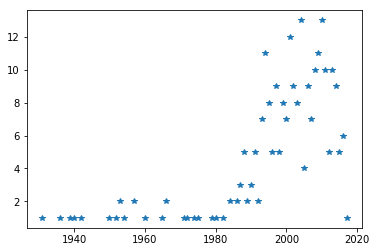

In [67]:
plt.plot(s_year.index.astype('int'), s_year.values, '*')

In [68]:
def is_select(x):
    return x.find('香港') != -1 
df_HK = df[df['area'].apply(is_select)]
df_HK

,cn_name,alias,rating,comment_number,director,year,area,types
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,718351,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
14,大话西游之大圣娶亲,西遊記大結局之仙履奇緣,9.2,546039,导演: 刘镇伟 Jeffrey Lau,1995,香港 中国大陆,喜剧 爱情 奇幻 冒险
22,无间道,無間道,9.0,445844,导演: 刘伟强 / 麦兆辉,2002,香港,剧情 犯罪 悬疑
32,活着,人生 / Lifetimes,9.1,298028,导演: 张艺谋 Yimou Zhang,1994,中国大陆 香港,剧情 历史 家庭
35,大话西游之月光宝盒,西遊記第壹佰零壹回之月光寶盒,8.9,439828,导演: 刘镇伟 Jeffrey Lau,1995,香港 中国大陆,喜剧 爱情 奇幻 冒险
77,让子弹飞,让子弹飞一会儿 / 火烧云,8.7,662582,导演: 姜文 Wen Jiang,2010,中国大陆 香港,剧情 喜剧 动作 西部
78,春光乍泄,春光乍洩,8.8,263608,导演: 王家卫 Kar Wai Wong,1997,香港 日本 韩国,剧情 爱情 同性
82,阳光灿烂的日子,In the Heat of the Sun,8.8,286929,导演: 姜文 Wen Jiang,1994,中国大陆 香港,剧情
85,重庆森林,重慶森林,8.7,351108,导演: 王家卫 Kar Wai Wong,1994,香港,剧情 爱情
90,射雕英雄传之东成西就,射鵰英雄傳之東成西就,8.7,291094,导演: 刘镇伟 Jeffrey Lau,1993,香港,喜剧 古装


In [69]:
dfHK=df_HK['year'].value_counts()
dfHK

1994    4
1993    4
2010    2
1995    2
1999    2
2001    1
1997    1
1987    1
1992    1
2000    1
1996    1
2006    1
1986    1
2002    1
1990    1
2004    1
1991    1
Name: year, dtype: int64

In [70]:
df_hk=dfHK.to_frame().reset_index()
df_hk

,index,year
0,1994,4
1,1993,4
2,2010,2
3,1995,2
4,1999,2
5,2001,1
6,1997,1
7,1987,1
8,1992,1
9,2000,1


In [71]:
df_HK=df_hk.sort_values(by='index',ascending=False)
df_HK

,index,year
2,2010,2
11,2006,1
15,2004,1
13,2002,1
5,2001,1
9,2000,1
4,1999,2
6,1997,1
10,1996,1
3,1995,2


In [ ]:
df_HK.to_csv('HK_year.csv')

In [73]:
def is_select(x):
    return x.find('大陆') != -1 
df_C = df[df['area'].apply(is_select)]
df_C

,cn_name,alias,rating,comment_number,director,year,area,types
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,718351,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
14,大话西游之大圣娶亲,西遊記大結局之仙履奇緣,9.2,546039,导演: 刘镇伟 Jeffrey Lau,1995,香港 中国大陆,喜剧 爱情 奇幻 冒险
30,鬼子来了,Devils on the Doorstep,9.2,253527,导演: 姜文 Wen Jiang,2000,中国大陆,剧情 战争
32,活着,人生 / Lifetimes,9.1,298028,导演: 张艺谋 Yimou Zhang,1994,中国大陆 香港,剧情 历史 家庭
35,大话西游之月光宝盒,西遊記第壹佰零壹回之月光寶盒,8.9,439828,导演: 刘镇伟 Jeffrey Lau,1995,香港 中国大陆,喜剧 爱情 奇幻 冒险
77,让子弹飞,让子弹飞一会儿 / 火烧云,8.7,662582,导演: 姜文 Wen Jiang,2010,中国大陆 香港,剧情 喜剧 动作 西部
79,大闹天宫,大闹天宫 上下集 / The Monkey King,9.2,108433,导演: 万籁鸣 Laiming Wan / 唐澄 Cheng Tang,2004(中国大陆),中国大陆,动画 奇幻
82,阳光灿烂的日子,In the Heat of the Sun,8.8,286929,导演: 姜文 Wen Jiang,1994,中国大陆 香港,剧情
84,末代皇帝,The Last Emperor,8.9,182367,导演: 贝纳尔多·贝托鲁奇 Bernardo Bertolucci,1987,意大利 中国大陆 英国 法国,剧情 传记 历史
117,岁月神偷,歲月神偷,8.6,318329,导演: 罗启锐 Alex Law,2010,香港 中国大陆,剧情 家庭


In [74]:
dfC=df_C['year'].value_counts()
dfC

1994          2
1995          2
2010          2
1979          1
2004          1
2004(中国大陆)    1
2015          1
2006          1
1992          1
1993          1
1987          1
2014          1
2000          1
Name: year, dtype: int64

In [75]:
df_C=dfC.to_frame().reset_index()
df_C

,index,year
0,1994,2
1,1995,2
2,2010,2
3,1979,1
4,2004,1
5,2004(中国大陆),1
6,2015,1
7,2006,1
8,1992,1
9,1993,1


In [76]:
df_C=df_C.sort_values(by='index',ascending=False)
df_C

,index,year
6,2015,1
11,2014,1
2,2010,2
7,2006,1
5,2004(中国大陆),1
4,2004,1
12,2000,1
1,1995,2
0,1994,2
9,1993,1


In [72]:
df_C.to_csv('C_year.csv')

In [ ]:
# !pip3 install wordcloud

In [45]:
# from os import path
# from wordcloud import WordCloud
# d = path.dirname(__file__) # 当前文件文件夹所在目录
# font_path=path.join(d,'华文仿宋.ttf')
# font = r'Macintosh HD:/Library/Fonts/NISC18030.ttf'
# wc=WordCloud(font_path=font,width=800, height=400)

In [46]:
# types_count=df_types_count_clean['index'].to_dict()

In [47]:
# types_count

In [ ]:
# w=wc.generate_from_frequencies(word_count)